In [11]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_format = 'retina'

# loading all the 3 datasets

In [13]:
accidents = pd.read_csv("Accident0515.csv",index_col="Accident_Index")
casualities= pd.read_csv("Casualities0515.csv",error_bad_lines = False,index_col="Accident_Index",warn_bad_lines = False)
vehicles= pd.read_csv("Vehicles0515.csv",error_bad_lines = False,index_col="Accident_Index",warn_bad_lines = False)


In [15]:
#print out the accidents dataset
accidents.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,...,0,1,1,2,2,0,0,1,1,E01002849
200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,...,0,5,4,1,1,0,0,1,1,E01002909
200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,...,0,0,4,1,1,0,0,1,1,E01002857
200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,...,0,0,1,1,1,0,0,1,1,E01002840
200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,...,0,0,7,1,2,0,0,1,1,E01002863


# merge accidents and vehicle datasets.......basing on the fact tht the two dataset are easily related in the case of accidents

In [24]:
#we do this so that we can easily cm out qith insights
Accidents = pd.merge(accidents,vehicles, on='Accident_Index', how='outer')

In [25]:
#print out the Accidents dataset
Accidents.head()

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Was_Vehicle_Left_Hand_Drive?_y,Journey_Purpose_of_Driver_y,Sex_of_Driver_y,Age_of_Driver_y,Age_Band_of_Driver_y,Engine_Capacity_(CC)_y,Propulsion_Code_y,Age_of_Vehicle_y,Driver_IMD_Decile_y,Driver_Home_Area_Type_y
Accident_Index,,,,,,,,,,,,,,,,,,,,,
200501BS00001,-0.191170,51.489096,1.0,2.0,1.0,1.0,3.0,12.0,E09000020,3.0,...,1,15,2,74,10,-1,-1,-1,7,1
200501BS00001,-0.191170,51.489096,1.0,2.0,1.0,1.0,3.0,12.0,E09000020,3.0,...,1,15,2,74,10,-1,-1,-1,7,1
200501BS00002,-0.211708,51.520075,1.0,3.0,1.0,1.0,4.0,12.0,E09000020,4.0,...,1,1,1,42,7,8268,2,3,-1,-1
200501BS00002,-0.211708,51.520075,1.0,3.0,1.0,1.0,4.0,12.0,E09000020,4.0,...,1,1,1,42,7,8268,2,3,-1,-1
200501BS00003,-0.206458,51.525301,1.0,3.0,2.0,1.0,5.0,12.0,E09000020,5.0,...,1,1,1,35,6,8300,2,5,2,1


In [26]:
#if your to realise sm of the columns have been neglected after merging
Accidents.columns

Index(['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Vehicle_Reference_x', 'Vehicle_Type_x', 'Towing_and_Articulation_x',
       'Vehicle_Manoeuvre_x', 'Vehicle_Location-Restricted_Lane_x',
       'Junction_Location_x', 'Skidding_and_Overturning_x',
       'Hit_Object_in_Carriageway_x', 'Vehicle_Leaving_Carriageway_x',
       'Hit_Object_off_Carriageway_x', '1st_Point_of_Impact_x',
       'Was_Vehicle_Left_Hand_Dri

### cleaning of the 2 datasets and conversion of datatypes

In [33]:

for col in accidents.columns:
    Accidents = (accidents[accidents[col]!=-1])
for col in casualities.columns:
    casualities = (casualities[casualities[col]!=-1])
    
    Accidents['Date_time'] = pd.to_datetime(Accidents.Date_time)


##### checking for missing values

In [34]:
print(Accidents.isnull().values.any())

False


##### checking for missing values

In [32]:
print(casualities.isnull().values.any())

False


# the mainn issue hea is i have 2 dataset the big dataset accident which in this case is my train dataset and the small dataset the casualities which will be my test dataset.....

# visualisations

###### am first going to look at what times accidents happen using the accidents dataset

Text(0.5, 0, '0 - Sunday , 1 - Monday , 2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

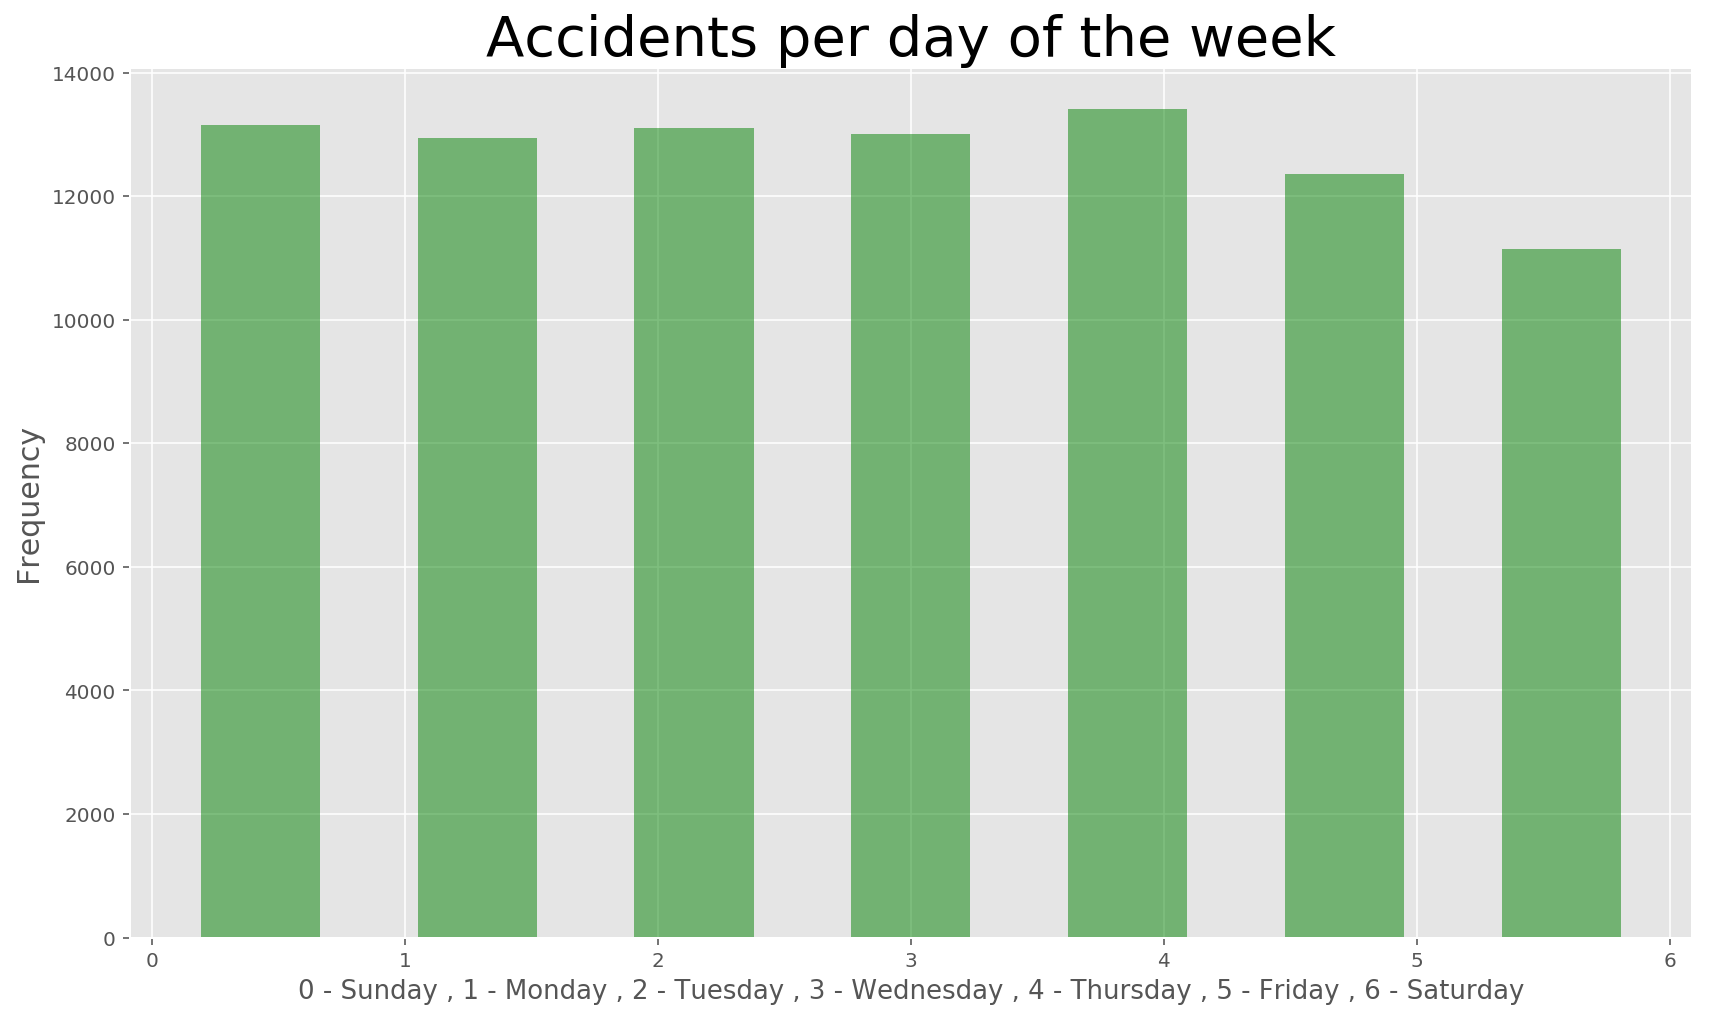

In [52]:
plt.figure(figsize=(14,8))
Accidents.Date_time.dt.dayofweek.hist(bins=7,rwidth=0.55,alpha=0.5, color='green')
plt.title('Accidents per day of the week' , fontsize=28)
plt.grid(True)
plt.ylabel('Frequency' , fontsize=15)
plt.xlabel('0 - Sunday , 1 - Monday , 2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize =13)

###### Thursday has the highest number of accidents in the day of the week

###### we can go ahead and look at what time of the day do these accidents take place

Text(0.5, 0, 'time')

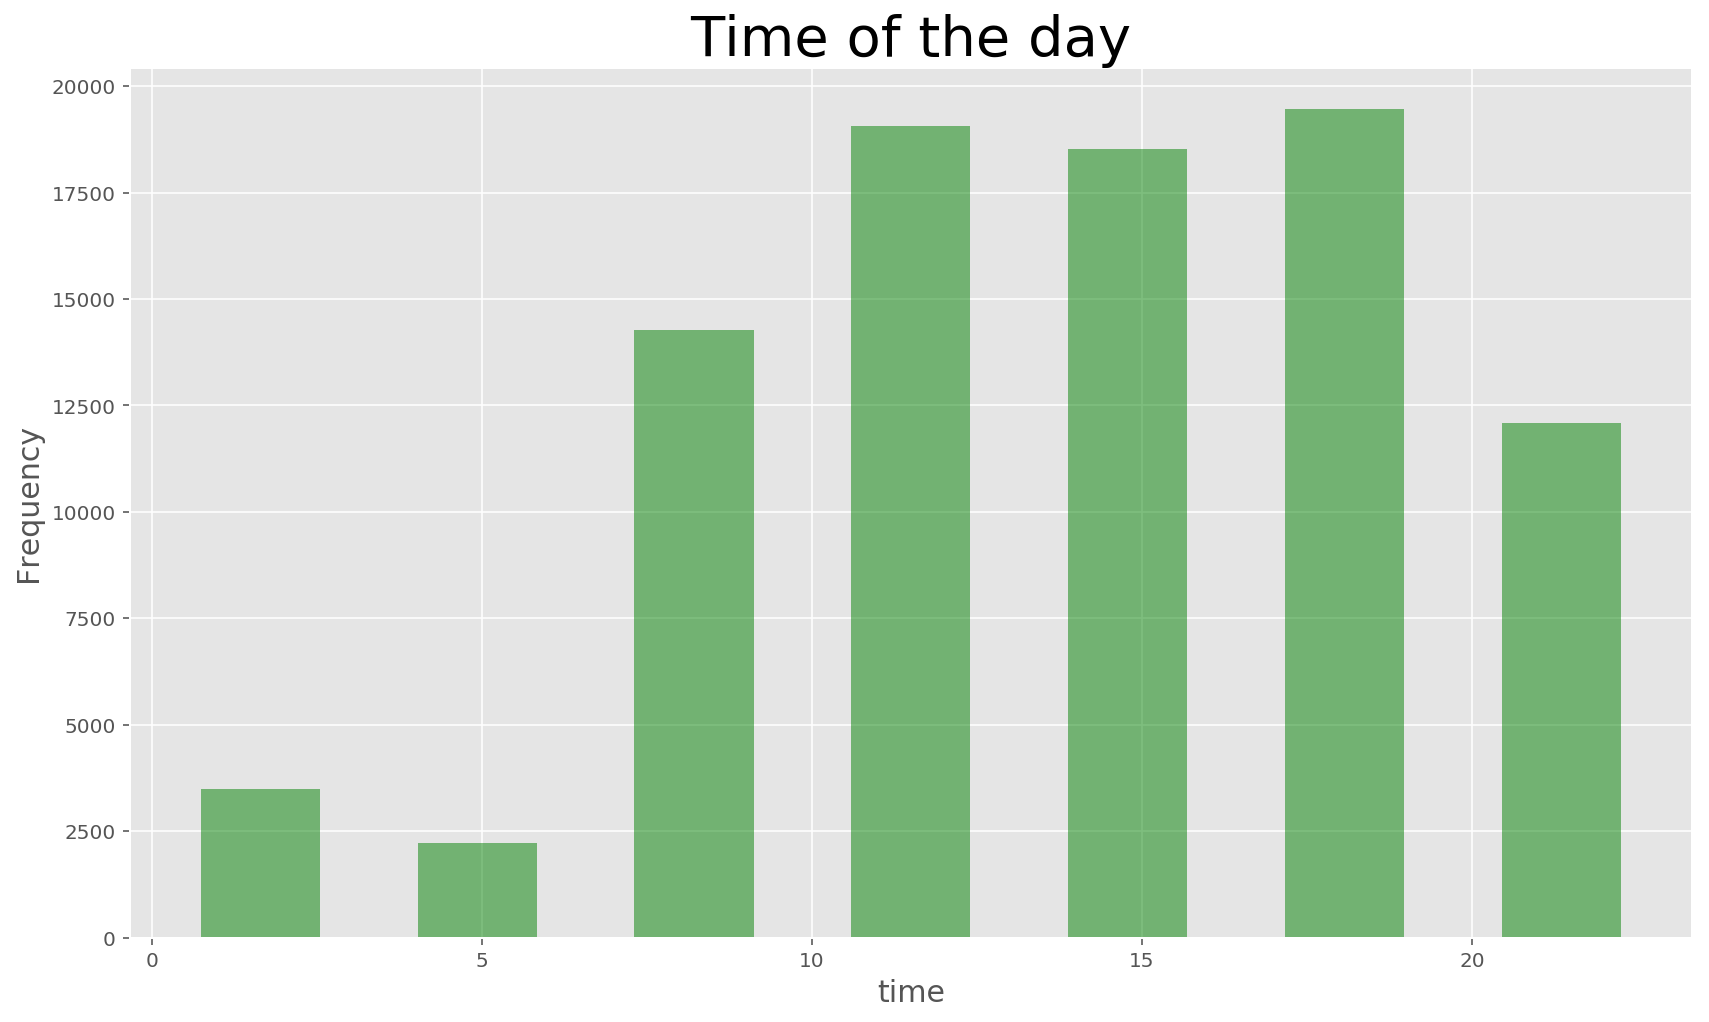

In [54]:
plt.figure(figsize=(14,8))
Accidents.Date_time.dt.hour.hist(bins=7,rwidth=0.55,alpha=0.5, color='green')
plt.title('Time of the day' , fontsize=28)
plt.grid(True)
plt.ylabel('Frequency' , fontsize=15)
plt.xlabel('time' , fontsize=15)


###### As we can see most of the accidents take place in the middle of the day.....i can therefore conclude that most accidents occure during the day since people be moving arounf to and from work

##### out of the conclusions made above,i now move to the Casualities dataset to test if what i confirmed up matches with my insights hea...............heari will look at the Ages of the casualities and the Age band sicne they will give me the vies of the whole dataset


In [58]:
casualities.head()

,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
Accident_Index,,,,,,,,,,,,,,
201101BS70001,1,1,3,2,25,5,3,5,1,0,0,2,0,1
201101BS70002,2,1,1,1,30,6,2,0,0,0,0,0,3,1
201101BS70003,1,1,3,1,48,8,3,6,9,0,0,2,0,1
201101BS70005,1,1,2,1,56,9,3,0,0,2,0,0,8,1
201101BS70005,2,3,2,1,20,4,3,0,0,2,0,0,9,1


Text(0.5, 0, 'Age_of_Casualty')

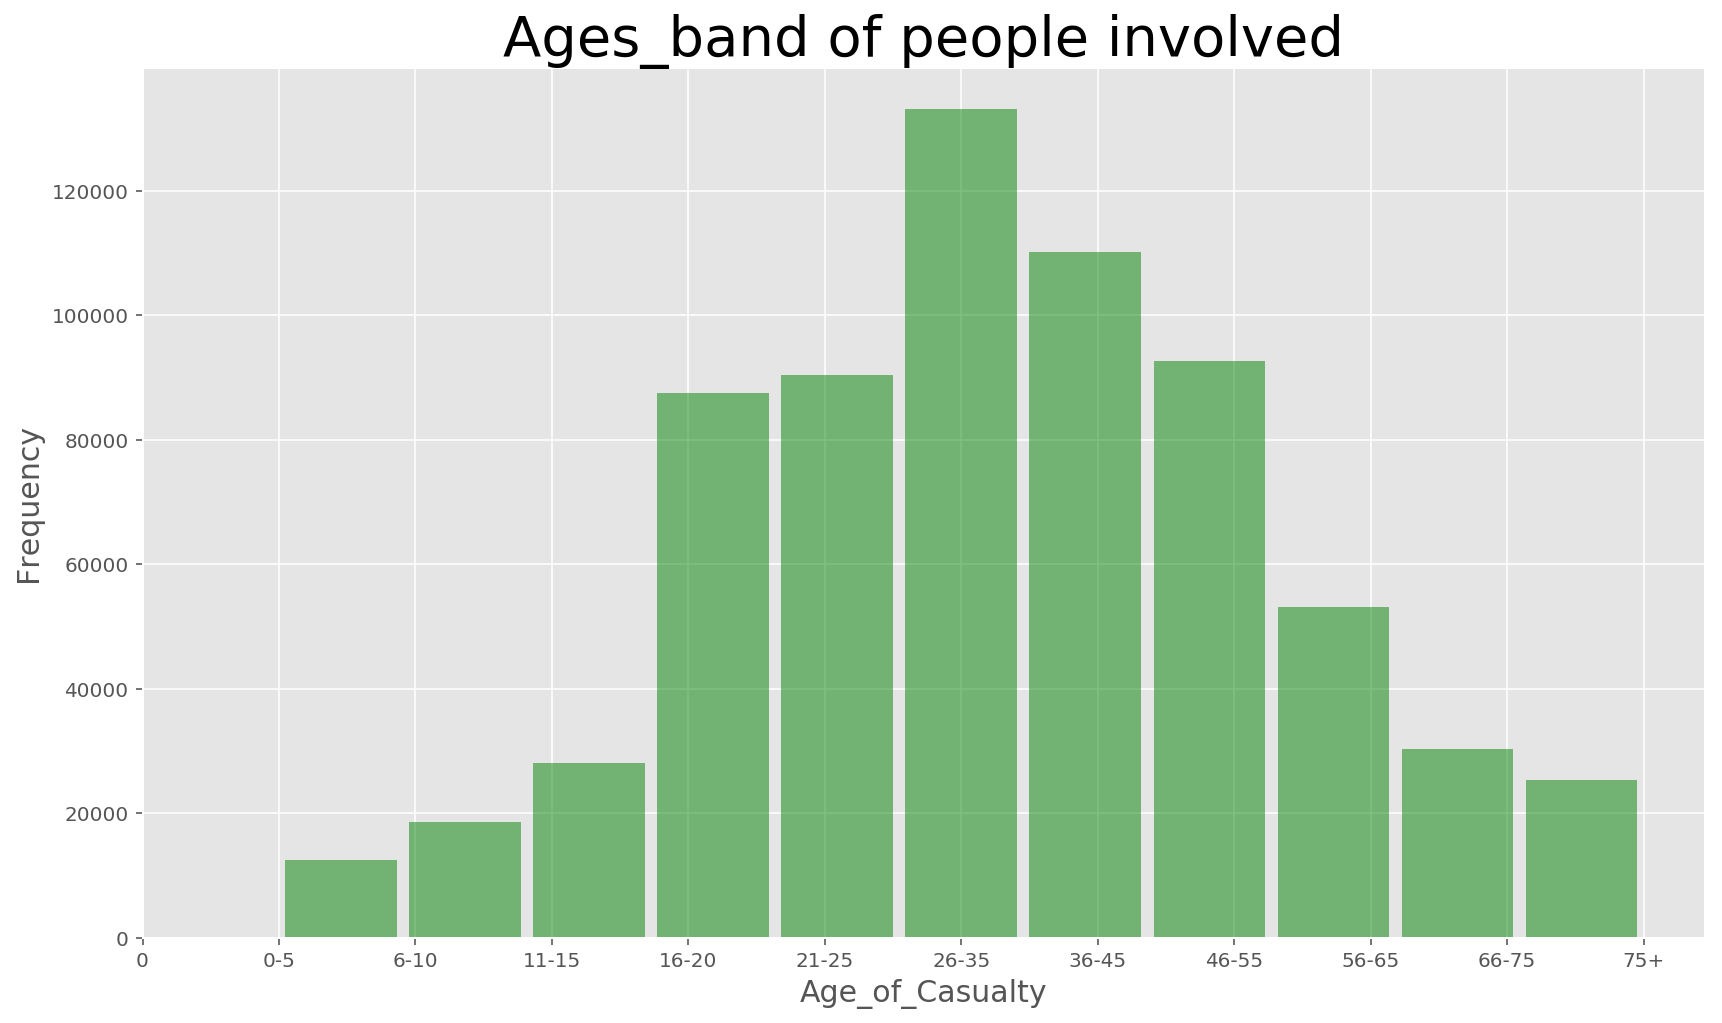

In [69]:
import numpy as np

Bands =['0','0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','75+']
plt.figure(figsize=(14,8))
casualities.Age_Band_of_Casualty.hist(bins=11,rwidth=0.90,alpha=0.5, color='green')
plt.title('Ages_band of people involved' , fontsize=28)
plt.grid(True)
y_pos = np.arange(len(Bands))
plt.xticks(y_pos , Bands)
plt.ylabel('Frequency' , fontsize=15)
plt.xlabel('Age_of_Casualty' , fontsize=15)


###### most of the middle aged casualities have accidents.....according to the age bands provided,....drivers between 21-25 have the most accidents......i can conclude that maybe this is because of reckless driving of these young people

In [67]:
print(np.__version__)

1.16.2
